<a href="https://colab.research.google.com/github/pbdnair/intellipat_demo/blob/main/27th_Feb_CNN_%26_VGG16_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
from shutil import copy

In [ ]:
! mkdir -p /root/.kaggle 
! mv kaggle.json /root/.kaggle 

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 96% 260M/271M [00:08<00:00, 42.5MB/s]
100% 271M/271M [00:08<00:00, 33.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 77.1MB/s]
 98% 534M/543M [00:06<00:00, 84.5MB/s]
100% 543M/543M [00:06<00:00, 87.9MB/s]


In [ ]:
! unzip -q train.zip

In [ ]:
imageNames = []
labels =[]
for imageName in os.listdir("train/"): 
  imageNames.append(imageName)
  if "cat" in imageName: 
    labels.append("cat")
  elif "dog" in imageName: 
    labels.append("dog")

In [ ]:
len(imageNames), len(labels)

(25000, 25000)

In [ ]:
traindf = pd.DataFrame()
traindf["imageName"] = imageNames
traindf["labels"] = labels

In [ ]:
traindf.sample(5)

,imageName,labels
8751,cat.3442.jpg,cat
23383,dog.11225.jpg,dog
17091,dog.3744.jpg,dog
12545,cat.9301.jpg,cat
13538,dog.4535.jpg,dog


In [ ]:
bs = 128

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,  #aug
                                                      rescale=1/255.0, #normalization
                                                      validation_split=0.1) #valid

In [ ]:
train_gen = idg.flow_from_dataframe(traindf, directory="train", 
                                    x_col="imageName", y_col="labels", 
                                    target_size=(150, 150), batch_size=bs, 
                                    subset="training")

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
valid_gen = idg.flow_from_dataframe(traindf, directory="train", 
                                    x_col="imageName", y_col="labels", 
                                    target_size=(150, 150), batch_size=bs, 
                                    subset="validation")

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
del model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(150, 150, 3)))
# Chunk 1 
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), 
                                 activation = tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Chunk 2 
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), 
                                 activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
model.compile(tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=["acc"])

In [ ]:
hist = model.fit(train_gen, batch_size=bs, epochs=10, validation_data=valid_gen)

Epoch 1/10
176/176 [==============================] - 118s 666ms/step - loss: 0.6705 - acc: 0.5724 - val_loss: 0.6616 - val_acc: 0.5768
Epoch 2/10
176/176 [==============================] - 83s 469ms/step - loss: 0.6464 - acc: 0.6192 - val_loss: 0.6372 - val_acc: 0.6096
Epoch 3/10
176/176 [==============================] - 82s 468ms/step - loss: 0.6295 - acc: 0.6379 - val_loss: 0.6169 - val_acc: 0.6416
Epoch 4/10
176/176 [==============================] - 82s 468ms/step - loss: 0.6167 - acc: 0.6525 - val_loss: 0.6145 - val_acc: 0.6456
Epoch 5/10
176/176 [==============================] - 82s 466ms/step - loss: 0.6015 - acc: 0.6676 - val_loss: 0.6030 - val_acc: 0.6540
Epoch 6/10
176/176 [==============================] - 82s 467ms/step - loss: 0.5881 - acc: 0.6817 - val_loss: 0.5799 - val_acc: 0.6820
Epoch 7/10
176/176 [==============================] - 82s 465ms/step - loss: 0.5751 - acc: 0.6978 - val_loss: 0.5673 - val_acc: 0.7064
Epoch 8/10
176/176 [==============================] - 

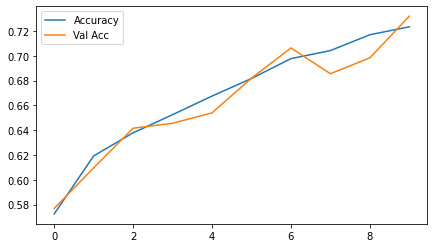

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(hist.history.get("acc"), label="Accuracy")
plt.plot(hist.history.get("val_acc"), label="Val Acc")
plt.legend()
plt.show()

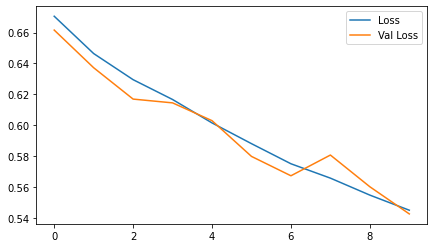

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(hist.history.get("loss"), label="Loss")
plt.plot(hist.history.get("val_loss"), label="Val Loss")
plt.legend()
plt.show()

In [ ]:
# epochs  - 50 

In [ ]:
# Oxford Uni 
# VGG Dept 
# VGG16 

In [ ]:
vgg16 = tf.keras.applications.VGG16()

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg16.input_shape
# VGG16 expects a image of (224, 224, 3)

(None, 224, 224, 3)

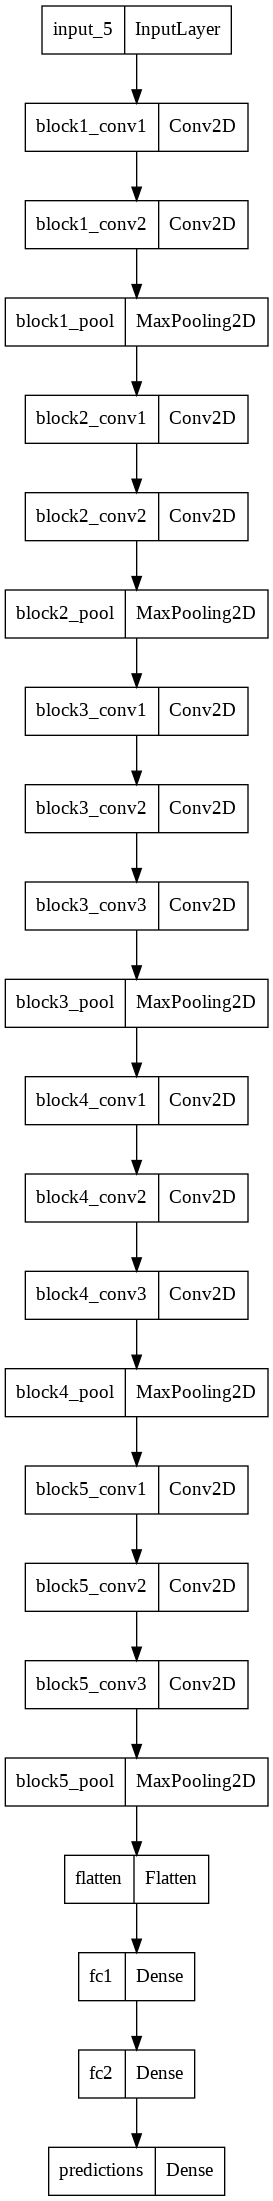

In [ ]:
tf.keras.utils.plot_model(vgg16)

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
modelS = vgg16.to_json()

In [ ]:
modelS

'{"class_name": "Functional", "config": {"name": "vgg16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_5"}, "name": "input_5", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "block1_conv1", "inbound_nodes": [[["input_5", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "block1_conv2", "trainable": true, "dtype": "float32", "fil

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input((150, 150,3)))
model2.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Input((150, 150, 3)))
model3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Iterate over Layers

In [ ]:
for layer in vgg16.layers:
  print(f"Name: {layer.name}")
  print(f"\t Inp: {layer.input_shape}")
  print(f"\t Out: {layer.output_shape}")
  print(f"\t Train: {layer.trainable}")
  if "conv" in layer.name:
    print(f"\t Kernel Size: {layer.kernel_size}")
    print(f"\t Stride Size: {layer.strides}")
  if 'pool' in layer.name: 
    print(f"\t Pool Size: {layer.pool_size}")
    print(f"\t Stride Size: {layer.strides}")

Name: input_5
	 Inp: [(None, 224, 224, 3)]
	 Out: [(None, 224, 224, 3)]
	 Train: True
Name: block1_conv1
	 Inp: (None, 224, 224, 3)
	 Out: (None, 224, 224, 64)
	 Train: True
	 Kernel Size: (3, 3)
	 Stride Size: (1, 1)
Name: block1_conv2
	 Inp: (None, 224, 224, 64)
	 Out: (None, 224, 224, 64)
	 Train: True
	 Kernel Size: (3, 3)
	 Stride Size: (1, 1)
Name: block1_pool
	 Inp: (None, 224, 224, 64)
	 Out: (None, 112, 112, 64)
	 Train: True
	 Pool Size: (2, 2)
	 Stride Size: (2, 2)
Name: block2_conv1
	 Inp: (None, 112, 112, 64)
	 Out: (None, 112, 112, 128)
	 Train: True
	 Kernel Size: (3, 3)
	 Stride Size: (1, 1)
Name: block2_conv2
	 Inp: (None, 112, 112, 128)
	 Out: (None, 112, 112, 128)
	 Train: True
	 Kernel Size: (3, 3)
	 Stride Size: (1, 1)
Name: block2_pool
	 Inp: (None, 112, 112, 128)
	 Out: (None, 56, 56, 128)
	 Train: True
	 Pool Size: (2, 2)
	 Stride Size: (2, 2)
Name: block3_conv1
	 Inp: (None, 56, 56, 128)
	 Out: (None, 56, 56, 256)
	 Train: True
	 Kernel Size: (3, 3)
	 Stride Si

In [ ]:
result_array = np.zeros(shape=(1, 1000))
result_array[0] = 1

In [ ]:
tf.keras.applications.vgg16.decode_predictions(result_array)

49152/35363 [=========================================] - 0s 0us/step


[[('n15075141', 'toilet_tissue', 1.0),
  ('n02319095', 'sea_urchin', 1.0),
  ('n02395406', 'hog', 1.0),
  ('n02391049', 'zebra', 1.0),
  ('n02389026', 'sorrel', 1.0)]]

In [ ]:
! cat /root/.keras/models/imagenet_class_index.json

{"0": ["n01440764", "tench"], "1": ["n01443537", "goldfish"], "2": ["n01484850", "great_white_shark"], "3": ["n01491361", "tiger_shark"], "4": ["n01494475", "hammerhead"], "5": ["n01496331", "electric_ray"], "6": ["n01498041", "stingray"], "7": ["n01514668", "cock"], "8": ["n01514859", "hen"], "9": ["n01518878", "ostrich"], "10": ["n01530575", "brambling"], "11": ["n01531178", "goldfinch"], "12": ["n01532829", "house_finch"], "13": ["n01534433", "junco"], "14": ["n01537544", "indigo_bunting"], "15": ["n01558993", "robin"], "16": ["n01560419", "bulbul"], "17": ["n01580077", "jay"], "18": ["n01582220", "magpie"], "19": ["n01592084", "chickadee"], "20": ["n01601694", "water_ouzel"], "21": ["n01608432", "kite"], "22": ["n01614925", "bald_eagle"], "23": ["n01616318", "vulture"], "24": ["n01622779", "great_grey_owl"], "25": ["n01629819", "European_fire_salamander"], "26": ["n01630670", "common_newt"], "27": ["n01631663", "eft"], "28": ["n01632458", "spotted_salamander"], "29": ["n01632777", 

In [ ]:
with open("/root/.keras/models/imagenet_class_index.json") as j:
  labels = j.read()

In [ ]:
labels #1000 labels 

'{"0": ["n01440764", "tench"], "1": ["n01443537", "goldfish"], "2": ["n01484850", "great_white_shark"], "3": ["n01491361", "tiger_shark"], "4": ["n01494475", "hammerhead"], "5": ["n01496331", "electric_ray"], "6": ["n01498041", "stingray"], "7": ["n01514668", "cock"], "8": ["n01514859", "hen"], "9": ["n01518878", "ostrich"], "10": ["n01530575", "brambling"], "11": ["n01531178", "goldfinch"], "12": ["n01532829", "house_finch"], "13": ["n01534433", "junco"], "14": ["n01537544", "indigo_bunting"], "15": ["n01558993", "robin"], "16": ["n01560419", "bulbul"], "17": ["n01580077", "jay"], "18": ["n01582220", "magpie"], "19": ["n01592084", "chickadee"], "20": ["n01601694", "water_ouzel"], "21": ["n01608432", "kite"], "22": ["n01614925", "bald_eagle"], "23": ["n01616318", "vulture"], "24": ["n01622779", "great_grey_owl"], "25": ["n01629819", "European_fire_salamander"], "26": ["n01630670", "common_newt"], "27": ["n01631663", "eft"], "28": ["n01632458", "spotted_salamander"], "29": ["n01632777",

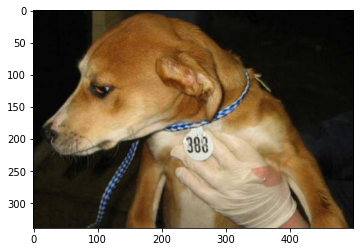

In [ ]:
image = 'train/dog.10006.jpg'
image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
plt.imshow(image)
#
image = cv2.resize(image, (224, 224))
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image, axis=0)

In [ ]:
image.shape
dr = vgg16.predict(image)

In [ ]:
tf.keras.applications.vgg16.decode_predictions(dr, top=10)

[[('n02090379', 'redbone', 0.2692932),
  ('n02087394', 'Rhodesian_ridgeback', 0.15401083),
  ('n02099712', 'Labrador_retriever', 0.08789183),
  ('n02091831', 'Saluki', 0.076314576),
  ('n02091244', 'Ibizan_hound', 0.061690014),
  ('n02115641', 'dingo', 0.035531513),
  ('n02100583', 'vizsla', 0.029174628),
  ('n02105412', 'kelpie', 0.026534365),
  ('n02099601', 'golden_retriever', 0.019536968),
  ('n02089867', 'Walker_hound', 0.017834432)]]